In [31]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import utils as u
importlib.reload(u)
from utils import categories, categories_scenes

## Globals

In [19]:
# Directories with images to evaluate
orig_imgs_dir = 'data/original'
experiments1_dir = 'data/experiments1/'  # Aggregated Attention
experiments2_dir = 'data/experiments2/'  # Scene-Based
sd_baseline_dir = 'data/sd_baseline/'

## Auxiliary Functions

### Scoring functions

## Load and Visualize Images

In [26]:
orig_imgs, img_names = u.load_original_images(orig_imgs_dir)
imgs1 = u.load_experiment_images(experiments1_dir)  # Aggregated Attention
imgs2 = u.load_experiment_images(experiments2_dir)  # Scene-Based
sd_base = u.load_experiment_images(sd_baseline_dir)

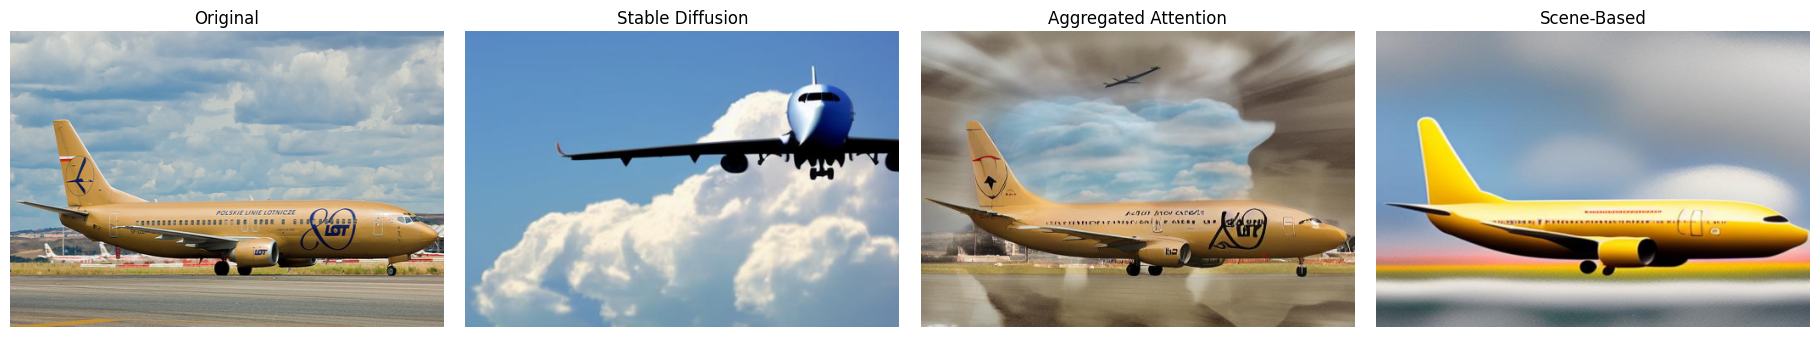

In [27]:
category = 'Airplane'
scene = 'Cloud'
idx = 0
u.imgs_compare(orig_imgs=orig_imgs, experiment_imgs=[sd_base, imgs1, imgs2], index=idx, show=True,
             experiment_names=['Stable Diffusion','Aggregated Attention', 'Scene-Based'],
            category='Airplane', scene='Cloud')

Generate above comparison for all images and save to folder

In [28]:
for category in categories:
    for scene in categories_scenes[category]:
        for idx, img_name in enumerate(img_names[category]):
            u.imgs_compare(orig_imgs=orig_imgs, experiment_imgs=[sd_base, imgs1, imgs2], index=idx, show=False,
                         experiment_names=['Stable Diffusion','Aggregated Attention', 'Scene-Based'],
                        category=category, scene=scene, save_dir = f'./results/imgs_compared/{category}/{scene}',
                        img_name=img_name)

Inception and FID scores

In [46]:
def fd_scores(orig_imgs, experiment_imgs, score_metric):
    resized_orig_imgs = u.standardize_sizes(orig_imgs)
    scores = {}
    for category in categories:
        scores[category] = {}
        for scene in categories_scenes[category]:
            score = score_metric(resized_orig_imgs[category], experiment_imgs[category][scene])
            scores[category][scene] = score
    scores['all'] = score_metric(flatten_imgs(resized_orig_imgs), flatten_imgs(experiment_imgs))
    return scores

def flatten_imgs(imgs):
    try: # flatten experiment imgs
        return np.concatenate([np.array(imgs[category][scene]) for category in categories for scene in categories_scenes[category]])
    except TypeError: # flatten original imgs. Obs: if inhomogeneous sizes, will raise warning
        return np.concatenate([np.array(imgs[category]) for category in categories]) 
    
def is_scores(imgs, score_metric):
    scores = {}
    for category in categories:
        scores[category] = {}
        for scene in categories_scenes[category]:
            score = score_metric(imgs[category][scene])
            scores[category][scene] = score

    scores['all'] = score_metric(flatten_imgs(imgs))
    return scores

In [44]:
# compute IS scores for experiments 1, 2 and sd baseline
is_1 = is_scores(imgs1, u.compute_is_score) # Aggregated Attention
is_2 = is_scores(imgs2, u.compute_is_score) # Scene-Based
is_sd = is_scores(sd_base, u.compute_is_score)

# compute FID scores for experiments 1, 2 and sd baseline
fd_1 = fd_scores(orig_imgs, imgs1, u.compute_fid_score)
fd_2 = fd_scores(orig_imgs, imgs2, u.compute_fid_score)
fd_sd = fd_scores(orig_imgs, sd_base, u.compute_fid_score)

(30, 512, 512, 3)